In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [2]:
x = np.random.rand(100)+np.random.randint(-6,3,100)

In [3]:
x

array([-0.41808279, -1.60867878,  1.63500995, -4.53287105,  1.53117049,
        0.08303086, -0.61607159, -2.27515878, -2.57142003, -1.48057042,
       -3.26695247,  1.64861939, -4.34229305, -2.3100009 , -4.11815176,
       -4.92050718,  1.70909375, -2.65813723,  2.79627837, -3.28904104,
       -3.51328078, -4.52423249,  0.43683622, -4.41138088, -1.923071  ,
        0.33217168, -5.16004995, -2.54201626,  2.91964275, -4.53096144,
       -5.76721882,  1.20617951,  2.76601323,  2.04818509, -2.30071503,
       -5.93634079,  0.77274733,  0.52566311,  0.34131262, -2.71343007,
       -4.64123361,  0.05647328, -4.08304296, -1.5435093 , -2.55236276,
       -0.50417921, -2.81712341, -4.59830475, -1.49731208, -2.8589763 ,
       -4.07109781, -1.11288322, -1.58029701, -5.89293893, -3.25400917,
       -0.4205811 , -4.21453409, -5.54398282, -5.57301105, -5.18507778,
       -2.98212719, -1.03467343,  2.06129054, -3.90696646,  0.21827978,
       -5.82051961, -0.25640102, -4.27224179, -5.81635786, -3.66

In [4]:
y =  0.3*x**2 + 2*x + 5+ np.random.randn(100)

In [5]:
y

array([ 4.40192426,  1.38370647,  7.54597442,  2.41961409,  6.84481476,
        4.80307445,  3.50593321,  0.69703176,  0.73678143,  1.85278206,
        3.35810908,  9.54524613,  1.79053137,  2.95286551,  1.02280875,
        2.1828647 , 10.50845452,  3.50348349, 12.70324092,  3.03536985,
        0.73014263, -0.24018642,  7.55758489,  2.52074238,  1.7848015 ,
        6.13986214,  1.5591837 ,  4.2396456 , 13.97708437,  2.09857602,
        4.15602187,  6.48846675, 13.76736311,  9.09346134,  1.07302449,
        3.03136964,  4.99482392,  5.59573389,  4.93427825,  0.13670547,
        1.80967377,  4.87320538,  1.01022116,  2.48552155,  1.1396663 ,
        3.14241418,  2.21072556,  4.0169874 ,  4.42200388,  0.41790219,
        1.46390609,  2.89908552,  2.06071743,  3.22679646,  3.73572615,
        4.96745634,  1.94964312,  4.2480389 ,  2.39674355,  3.78778085,
        2.74568005,  4.22637878,  9.03708046,  3.51086806,  5.93481581,
        3.74279426,  6.63783016,  2.70258187,  2.61681029,  1.97

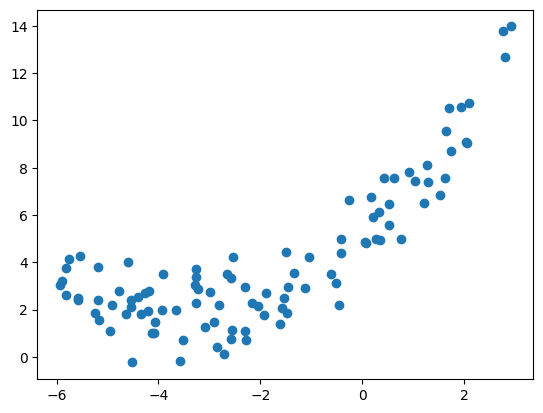

In [6]:
plt.scatter(x,y)

In [7]:
def generate_num(a,b,limit,nf=20):

    offset = (abs(a) + abs(b))/2
    x= np.random.rand(limit)+np.random.randint(a,b,limit)
    y = 0.3*x**2 + 2*x +np.random.randn(limit)*nf

    return x,y

In [8]:
generate_num(-6,3,100)

(array([-3.29558980e+00, -5.87012584e-01,  8.03475112e-01, -9.56328177e-02,
        -2.38846766e+00, -3.34366662e+00, -3.67134317e+00,  1.33012633e+00,
        -4.54812840e+00, -5.23271009e+00,  2.57457629e+00, -2.88717911e+00,
        -1.62967123e+00,  1.23537660e+00, -3.95157801e+00, -3.08284479e+00,
        -3.77739681e+00, -5.17715682e+00,  3.81376276e-01,  2.90861708e+00,
        -5.43842715e+00, -1.09465940e+00, -2.83774386e+00, -7.46840006e-01,
        -5.04314092e-01,  1.24817062e+00, -3.87210873e+00,  9.00427023e-01,
        -2.48963775e+00, -4.11256239e+00, -4.28191507e-01, -5.28072535e+00,
        -1.76188612e+00,  2.58726315e+00, -3.60795565e+00, -2.04501781e+00,
        -5.30375993e+00,  1.22282432e+00,  2.14014264e+00, -4.35882988e+00,
        -5.89149379e+00, -2.05955436e+00,  2.12174738e+00,  2.51733225e+00,
         2.78118227e+00, -2.71351329e+00, -4.45213531e+00, -4.88692427e+00,
        -5.87463499e-01,  2.91350698e+00, -3.68703751e+00, -3.49683290e+00,
        -1.6

In [9]:
reg = LinearRegression()

In [10]:
n,m = generate_num(-10,10,200,5)

train_x, test_x, train_y, test_y = train_test_split(n,m, test_size=0.3)

In [11]:
reg.fit(train_x.reshape(-1,1),train_y.reshape(-1,1))

LinearRegression()

In [204]:
y_pred = reg.predict(train_x.reshape(-1,1))

In [12]:
def regSummary(y_true, y_pred):
    return{
        "r2_score": r2_score(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "rmse": math.sqrt(mean_squared_error(y_true, y_pred))
    }

In [206]:
regSummary(train_y, y_pred)

{'r2_score': 0.5619031953360552,
 'mae': 7.879857997567097,
 'mse': 92.87760879571238,
 'rmse': 9.637302983496594}

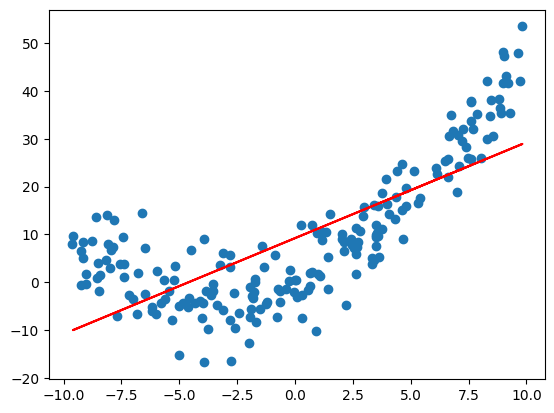

In [207]:
plt.scatter(n,m)
plt.plot(train_x, y_pred, color='red')

In [208]:
poly = PolynomialFeatures()

In [209]:
train_x1 = poly.fit_transform(train_x.reshape(-1,1))

In [213]:
test_x1 = poly.transform(test_x.reshape(-1,1))

In [212]:
reg.fit(train_x1,train_y)

LinearRegression()

In [214]:
y_pred = reg.predict(test_x1)

In [218]:
regSummary(test_y, y_pred)

{'r2_score': 0.8957438206126915,
 'mae': 3.897212085690566,
 'mse': 23.11793593061554,
 'rmse': 4.8081114723574725}

In [219]:
y_pred.shape

(60,)

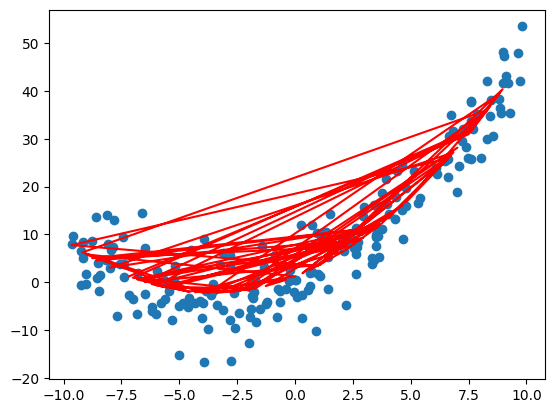

In [221]:
plt.scatter(n,m)
plt.plot(test_x, y_pred, color='red')

In [160]:
c1 = train_xx[:, 0]
c2 = train_xx[:, 1]
c3 = train_xx[:, 2]


In [223]:
# df = pd.DataFrame({"c1": c1,"c2": c2,"c3": c3, "y_pred":y_pred})
df = pd.DataFrame({"x":test_x, "y_pred":y_pred})

In [168]:
# df["Total Value"] = df.c1 + df.c2+df.c3

In [225]:
df = df.sort_values("x")

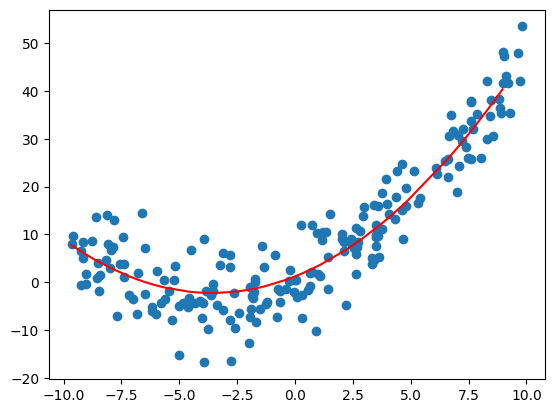

In [226]:
plt.scatter(n,m)
plt.plot(df["x"], df.y_pred, color='red')